In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2022-11-28 01:49:27--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  14.8MB/s    in 23s     

2022-11-28 01:49:50 (10.4 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [ ]:
!unzip -q tiny-imagenet-200.zip && ls tiny-imagenet-200

test  train  val  wnids.txt  words.txt


In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory('/content/tiny-imagenet-200/train')

Found 100000 files belonging to 200 classes.


In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory('/content/tiny-imagenet-200/test/')

Found 10000 files belonging to 1 classes.


In [ ]:
import pandas as pd

val_annot = pd.read_csv('/content/tiny-imagenet-200/val/val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])

In [ ]:
val_annot

,File,Class,X,Y,H,W
0,val_0.JPEG,n03444034,0,32,44,62
1,val_1.JPEG,n04067472,52,55,57,59
2,val_2.JPEG,n04070727,4,0,60,55
3,val_3.JPEG,n02808440,3,3,63,63
4,val_4.JPEG,n02808440,9,27,63,48
...,...,...,...,...,...,...
9995,val_9995.JPEG,n03085013,0,0,63,63
9996,val_9996.JPEG,n03444034,0,9,63,63
9997,val_9997.JPEG,n03424325,10,10,38,42
9998,val_9998.JPEG,n01629819,28,18,63,31


In [ ]:
val_annot_dict = val_annot[['File', 'Class']].set_index('File').to_dict()['Class']

In [ ]:
val_img_dir = '/content/tiny-imagenet-200/val/images/'
for img, folder in val_annot_dict.items():
    newpath = (os.path.join(val_img_dir, folder))
    print(newpath)
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    if os.path.exists(os.path.join(val_img_dir, img)):
        os.rename(os.path.join(val_img_dir, img), os.path.join(newpath, img))

Streaming output truncated to the last 5000 lines.
/content/tiny-imagenet-200/val/images/n02074367
/content/tiny-imagenet-200/val/images/n03977966
/content/tiny-imagenet-200/val/images/n03424325
/content/tiny-imagenet-200/val/images/n02236044
/content/tiny-imagenet-200/val/images/n01882714
/content/tiny-imagenet-200/val/images/n07711569
/content/tiny-imagenet-200/val/images/n03160309
/content/tiny-imagenet-200/val/images/n03544143
/content/tiny-imagenet-200/val/images/n01882714
/content/tiny-imagenet-200/val/images/n02909870
/content/tiny-imagenet-200/val/images/n02226429
/content/tiny-imagenet-200/val/images/n03085013
/content/tiny-imagenet-200/val/images/n02909870
/content/tiny-imagenet-200/val/images/n02808440
/content/tiny-imagenet-200/val/images/n01984695
/content/tiny-imagenet-200/val/images/n03983396
/content/tiny-imagenet-200/val/images/n01917289
/content/tiny-imagenet-200/val/images/n04008634
/content/tiny-imagenet-200/val/images/n03026506
/content/tiny-imagenet-200/val/images

In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory('/content/tiny-imagenet-200/val/images/')

Found 10000 files belonging to 200 classes.


In [ ]:
train_data.as_numpy_iterator().next()[0].shape

(32, 256, 256, 3)

In [ ]:
train_class_names = train_data.class_names
val_class_names = val_data.class_names

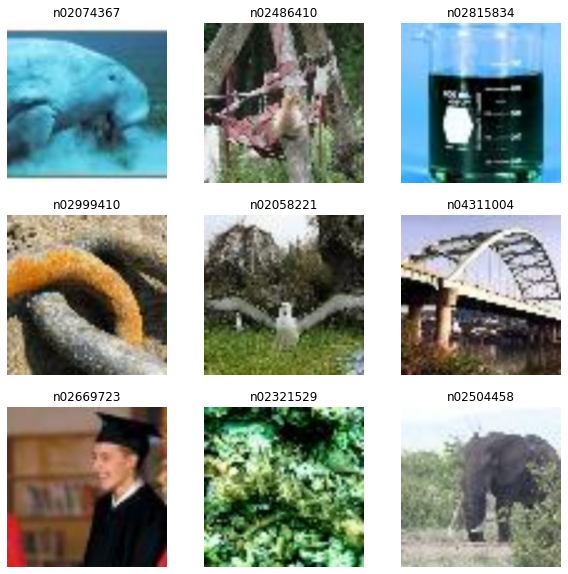

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[labels[i]])
    plt.axis("off")

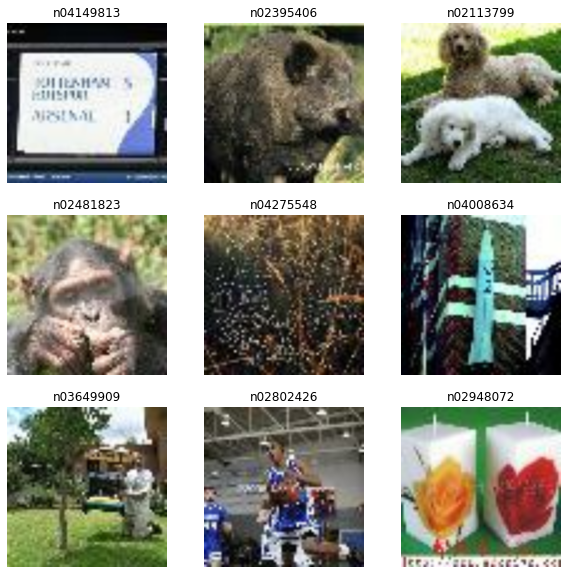

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(val_class_names[labels[i]])
    plt.axis("off")

In [ ]:
words = pd.read_csv('/content/tiny-imagenet-200/words.txt', sep='\t', header=None, names=['file', 'label'])

In [ ]:
words_dict = words.set_index('file').to_dict()['label']

In [ ]:
train_labels, val_labels = [], []
for i in train_data.class_names:
    train_labels.append(words_dict.get(i))
for i in val_data.class_names:
    val_labels.append(words_dict.get(i))

In [ ]:
train_data.class_names = train_labels
val_data.class_names = val_labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
le.fit(train_data.class_names)
train_data.class_names = le.transform(train_data.class_names)

In [ ]:
train_data = train_data.map(lambda x,y: (x/255, y))
val_data = val_data.map(lambda x,y: (x/255, y))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.applications.xception import Xception

In [ ]:
#model=Sequential()
#model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)
tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [ ]:
# Original
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(200, activation='softmax'))

In [ ]:
# Version 1

# model = Sequential()
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(Dropout(.3))
# model.add(MaxPooling2D())

# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(Dropout(.3))
# model.add(MaxPooling2D())

# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(Dropout(.3))
# model.add(MaxPooling2D())

# # model.add(Conv2D(128, (3,3), 1, activation='relu'))
# # model.add(Dropout(.3))
# # model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(64, activation='relu'))
# model.add(Dense(200, activation='softmax'))

In [ ]:
#Summary of Xception Model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)      

In [ ]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)      

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train_data, epochs=5, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/5
3125/3125 [==============================] - 172s 55ms/step - loss: 5.2994 - accuracy: 0.0043 - val_loss: 5.2984 - val_accuracy: 0.0050
Epoch 2/5
3125/3125 [==============================] - 162s 52ms/step - loss: 5.2994 - accuracy: 0.0043 - val_loss: 5.2984 - val_accuracy: 0.0050
Epoch 3/5
3125/3125 [==============================] - 163s 52ms/step - loss: 5.2994 - accuracy: 0.0043 - val_loss: 5.2984 - val_accuracy: 0.0050
Epoch 4/5
3125/3125 [==============================] - 171s 55ms/step - loss: 5.2994 - accuracy: 0.0042 - val_loss: 5.2984 - val_accuracy: 0.0050
Epoch 5/5
3125/3125 [==============================] - 170s 54ms/step - loss: 5.2994 - accuracy: 0.0044 - val_loss: 5.2984 - val_accuracy: 0.0050
